In [27]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
%matplotlib inline

### Load the dataset

In [28]:
### Load diabetes dataset from sklearn ###
diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"]) 

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### Prepare the Data set:
some basic steps are:
* Rehsape the data (if applies)
* Normalize the data 
* Understand the data 

In [21]:
def overview(x,string):
    print(f"Overview {string}")
    print(f"shape: {x.shape} Data type: {type(x)}\n")
    
def normalize(y):
    return (y - y.mean(axis=0))/y.std()
    
    
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]
targets = normalize(targets)

overview(data,"data")
overview(targets,"targets")

### SPLIT DATA ###
x_train,x_test,y_train,y_test = train_test_split(data,targets,test_size=0.2)

print("DATA SPLIT \n")
overview(x_train,"x_train")
overview(x_test,"x_test")

Overview data
shape: (442, 10) Data type: <class 'numpy.ndarray'>

Overview targets
shape: (442,) Data type: <class 'numpy.ndarray'>

DATA SPLIT 

Overview x_train
shape: (353, 10) Data type: <class 'numpy.ndarray'>

Overview x_test
shape: (89, 10) Data type: <class 'numpy.ndarray'>



There are many techiniques to Regularize training, the most famous being L2 Norm and Droput. We can implement them easily using TF2
* L2 Norm: `kernel_regularizer=tf.keras.regularizers.l2(wd)` Inisde the Dense layer.
* Droput:  `  model.add(tf.keras.layers.Dropout(rate))`  As another Layer.

In [47]:
def unregalarized_model(x):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense( 128 , activation='relu',input_shape=(x.shape[1],)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(128, activation='relu'))  
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(128,activation='relu'))
    model.add(tf.keras.layers.Dense(128,activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    
    return model

def regularized_model(x,wd,rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128 ,kernel_regularizer=tf.keras.regularizers.l2(wd) ,activation='relu',input_shape=(x.shape[1],)))
    model.add(tf.keras.layers.Dropout(rate))
    model.add(tf.keras.layers.Dense(128,kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'))
    model.add(tf.keras.layers.Dropout(rate))
    model.add(tf.keras.layers.Dense(128,kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'))  
    model.add(tf.keras.layers.Dropout(rate))
    model.add(tf.keras.layers.Dense(128,kernel_regularizer=tf.keras.regularizers.l2(wd), activation='relu'))
    model.add(tf.keras.layers.Dropout(rate))
    model.add(tf.keras.layers.Dense(128,kernel_regularizer=tf.keras.regularizers.l2(wd),activation='relu'))
    model.add(tf.keras.layers.Dropout(rate))
    model.add(tf.keras.layers.Dense(128,kernel_regularizer=tf.keras.regularizers.l2(wd),activation='relu'))
    model.add(tf.keras.layers.Dropout(rate))
    model.add(tf.keras.layers.Dense(1))
    
    return model


def compile_model(model):
    model.compile(optimizer="adam",loss="mse", metrics=["mae"])

## We can create a validation split in training ##
def train_model(model,x,y):
    return model.fit(x,y,epochs=100,validation_split=0.15,batch_size=64, verbose=0)

def evaluate_model(model,x,y):
    loss, mae =  model.evaluate(x ,y,verbose=0)
    print("\nTest Set Evaluation\n")
    print(f"Loss: {loss}")
    print(f"Mean Square Error: {mae}")

def plot_epochs(history,title):
    fig = plt.figure(figsize=(12, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title}: loss vs. epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()


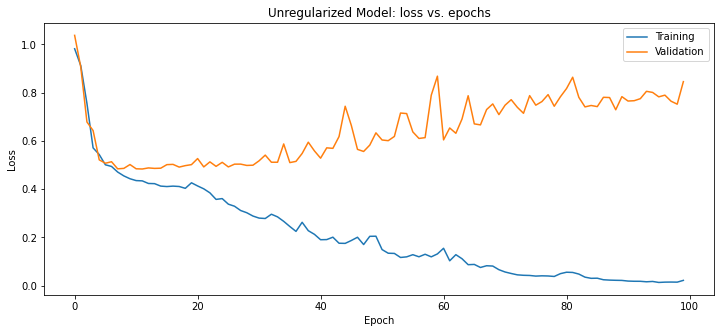


Test Set Evaluation

Loss: 0.780836820602417
Mean Square Error: 0.6946530342102051


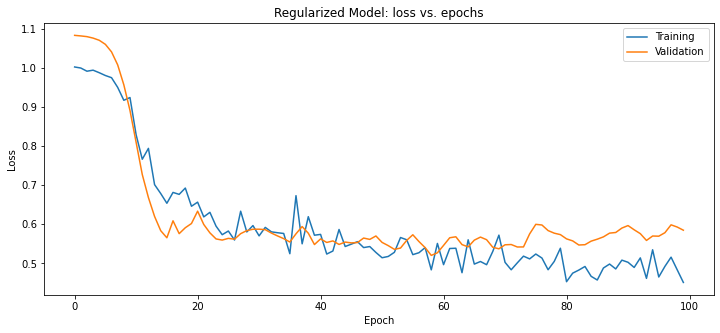


Test Set Evaluation

Loss: 0.5477724075317383
Mean Square Error: 0.5888275504112244


In [51]:
### UNREGULARIZED MODEL ###
model = unregalarized_model(x_train)             # Init unregularized model
compile_model(model)                             # Compile unregularized model
history = train_model(model,x_train,y_train)     # Train unregularized model
plot_epochs(history,title="Unregularized Model") # Plot unregularized model
evaluate_model(model,x_test,y_test)              # Evaluate Model

### REGULARIZED MODEL ###
model = regularized_model(x_train,wd=1e-5,rate=0.5) # Init regularized model
compile_model(model)                                # Compile regularized model
history = train_model(model,x_train,y_train)        # Train regularized model
plot_epochs(history,title="Regularized Model")      # Plot regularized model
evaluate_model(model,x_test,y_test)                 # Evaluate Model